# PIPELINE WITH MODEL 4, DATASET V3 (https://universe.roboflow.com/sidsproject/back_stomach_123_merged-xxmxb/dataset/1), DIFFERENT TYPES OF EMBEDDINGS

## PIPELINE
### 1. load model face_detection
### 2. create embeddings
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

## 1. load the model face_detection
Step 1 is the same for each pipeline, so we do it once at the beginning.

**Import dependencies**

In [1]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import os
from retrieval import ImageRetrieval
from classifier import Classifier

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path = f"{project_dir}/models/4.weights/best.pt"

**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [2]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


---
# EMBEDDING flag

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [3]:
embeddings = emb_builder.embedding_flags()


Creation of flags features embedding------------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40%-->    1700 / 4158 files processed
43%-->    1800 / 4158 files processed
45%-->    1900 / 4158 files processed
48%-->    2000 / 4158 files processed
50%-->    2100 / 4158 files processed
52%-->    2200 / 4158 files processed
55%-->    2300 / 4158 files processed
57%-->    240

In [4]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,1
...,...,...,...,...
4153,0,0,0,0
4154,0,0,0,0
4155,1,1,1,1
4156,1,1,1,1


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


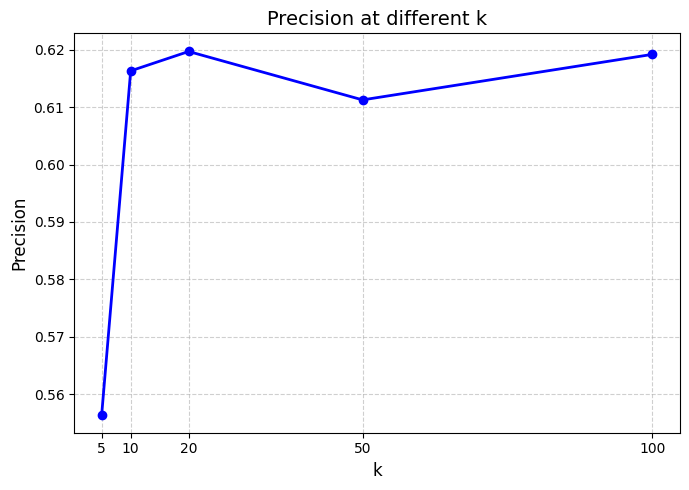


Recall at R-------------------------------------------------------------------------------
0.5829848787400435

Silhouette score--------------------------------------------------------------------------


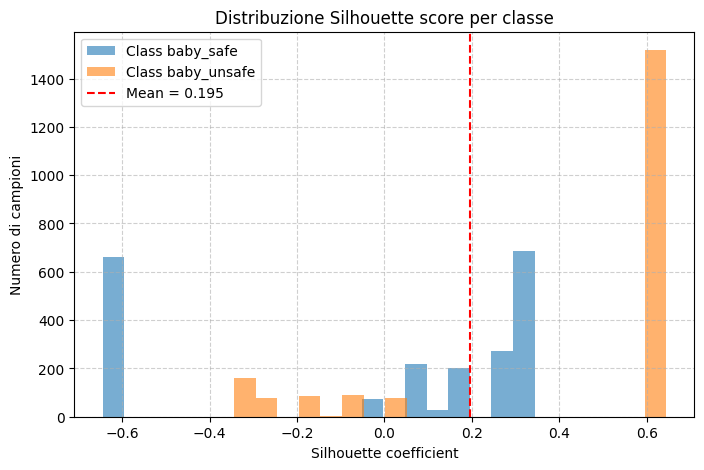


Embeddings distributions------------------------------------------------------------------


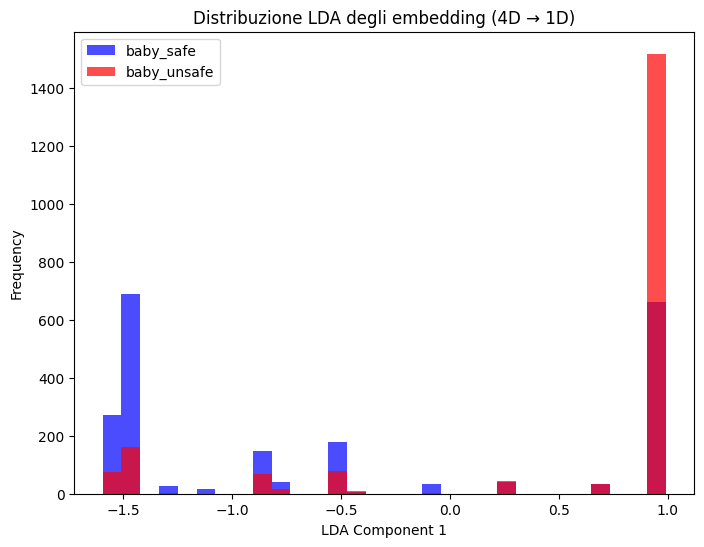

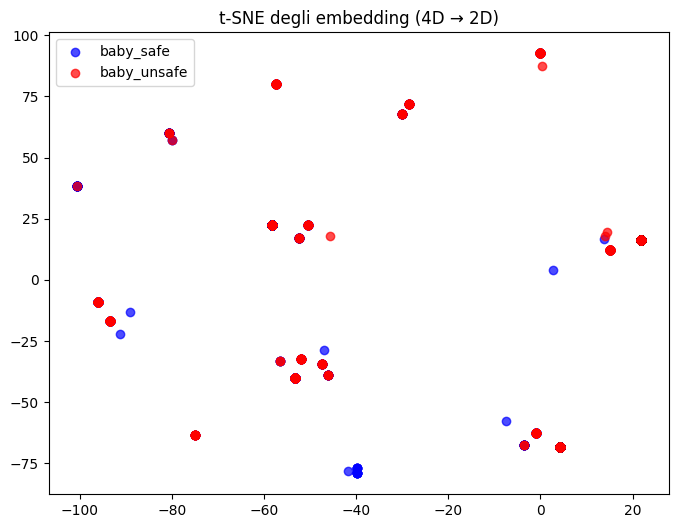

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


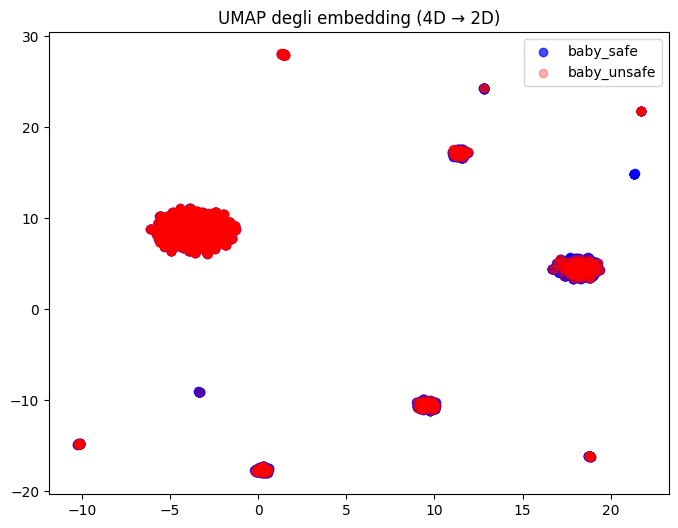

In [5]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


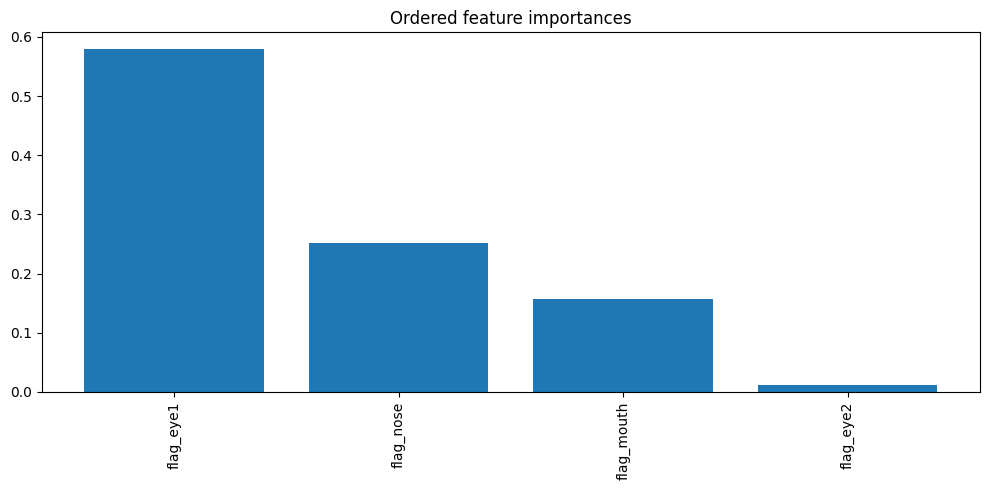

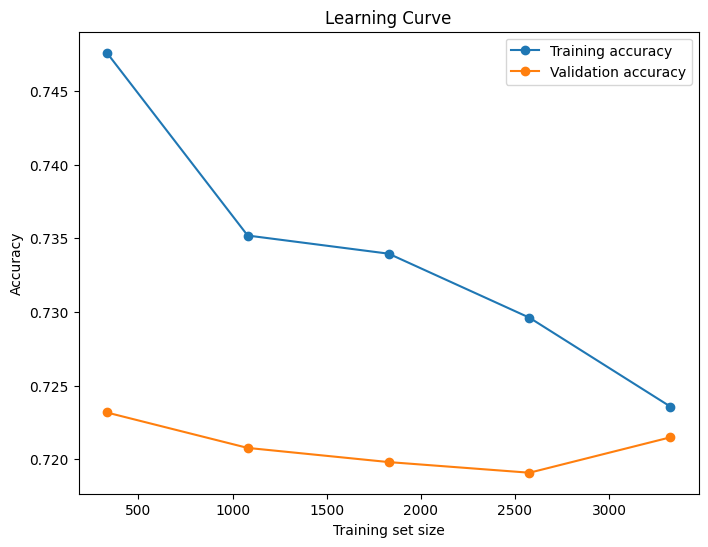


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.76      0.64      0.70       426
 baby_unsafe       0.68      0.79      0.73       406

    accuracy                           0.71       832
   macro avg       0.72      0.71      0.71       832
weighted avg       0.72      0.71      0.71       832

Confusion matrix---------------------------------------


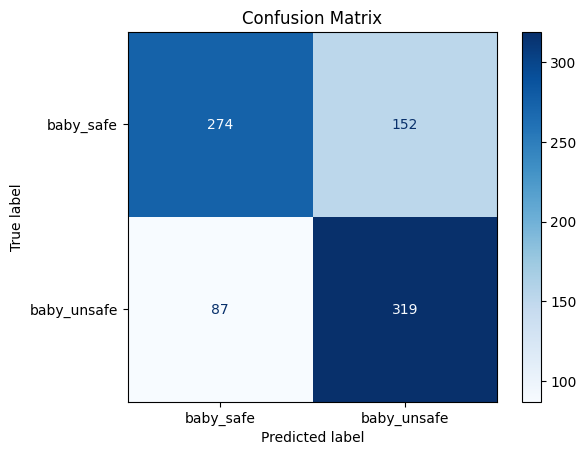

In [6]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDINGS all features

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [7]:
embeddings = emb_builder.embedding_all_features()


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40%-->    1700 / 4158 files processed
43%-->    1800 / 4158 files processed
45%-->    1900 / 4158 files processed
48%-->    2000 / 4158 files processed
50%-->    2100 / 4158 files processed
52%-->    2200 / 4158 files processed
55%-->    2300 / 4158 files processed
57%-->    240

In [8]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,face_vertical_length,face_angle_vertical,face_angle_horizontal,symmetry_diff
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.840860,0.275490,0.060125,122.830696,147.334481,0.085138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
4154,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
4155,1,1,1,1,0.597167,0.173149,0.714371,0.172533,0.670616,0.200792,0.651849,0.238090,0.117205,0.041754,83.913839,126.519640,0.051653
4156,1,1,1,1,0.443402,0.212502,0.510042,0.202835,0.481855,0.232249,0.484575,0.273965,0.067337,0.041805,120.912051,106.596983,0.007047


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


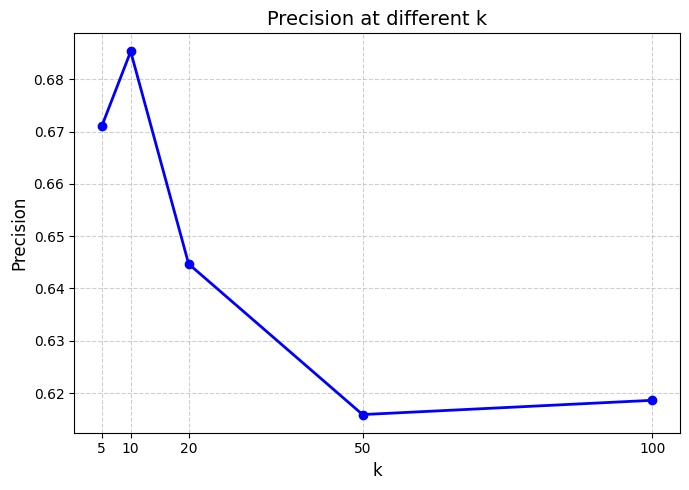


Recall at R-------------------------------------------------------------------------------
0.5546667579984337

Silhouette score--------------------------------------------------------------------------


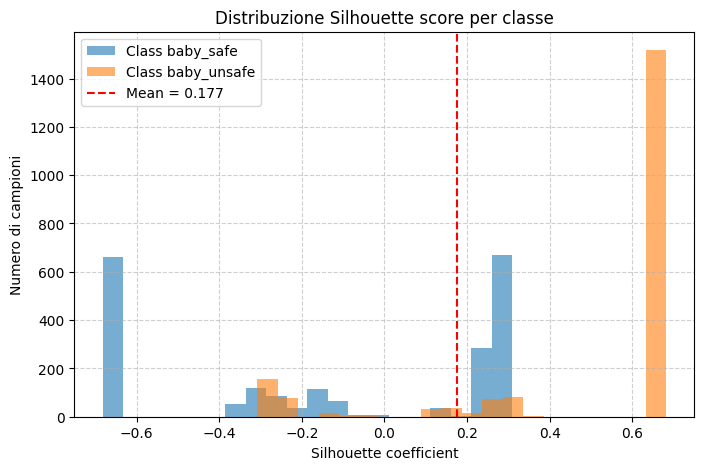


Embeddings distributions------------------------------------------------------------------


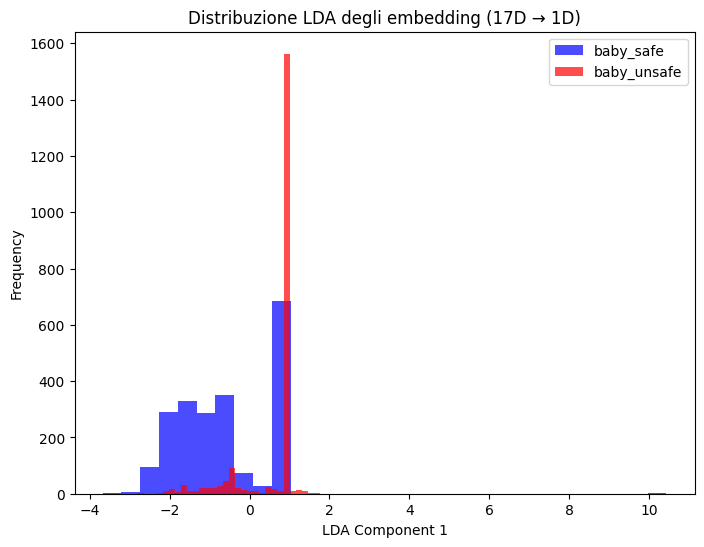

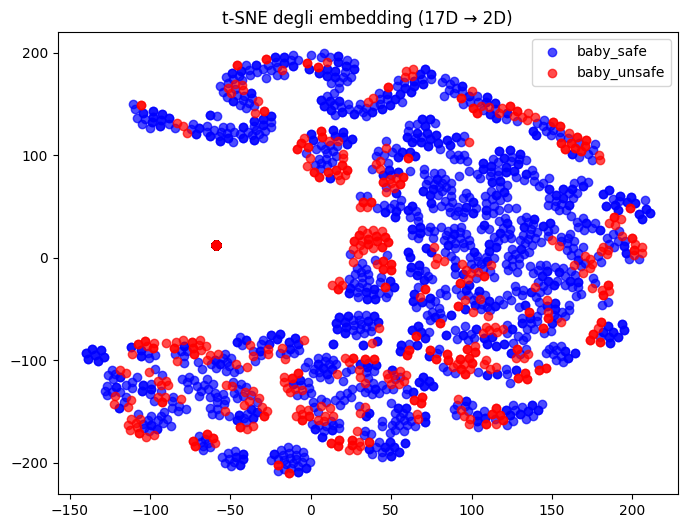

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


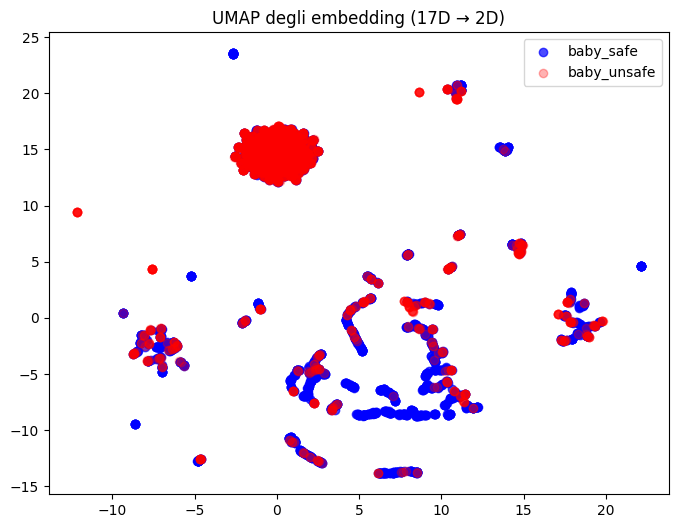

In [9]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


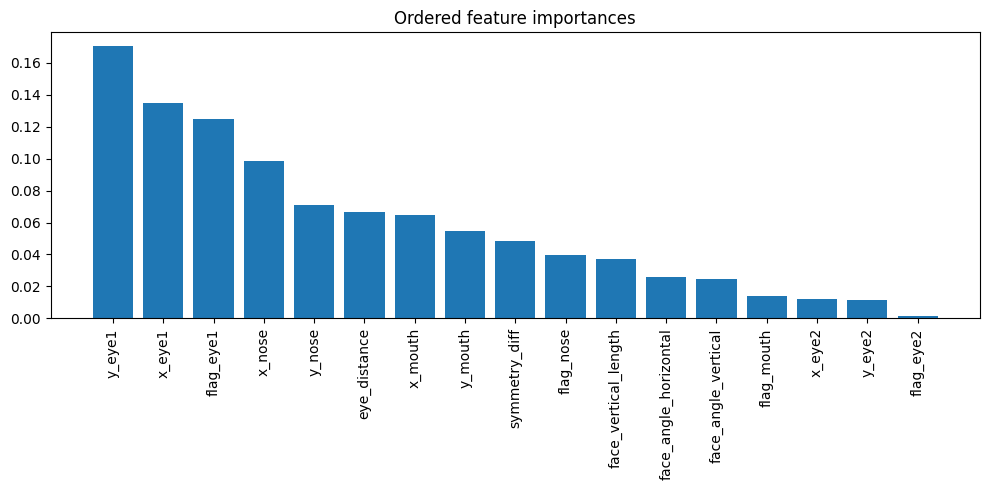

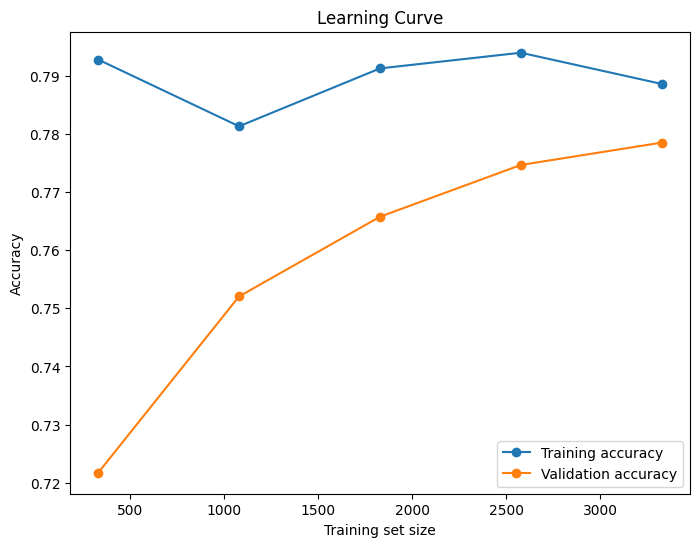


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.85      0.67      0.75       426
 baby_unsafe       0.72      0.87      0.79       406

    accuracy                           0.77       832
   macro avg       0.78      0.77      0.77       832
weighted avg       0.78      0.77      0.77       832

Confusion matrix---------------------------------------


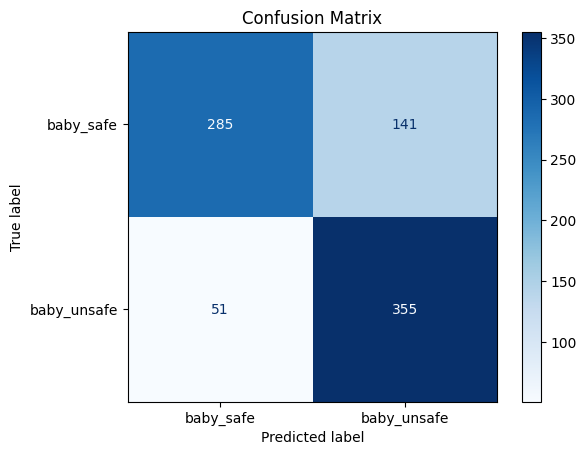

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


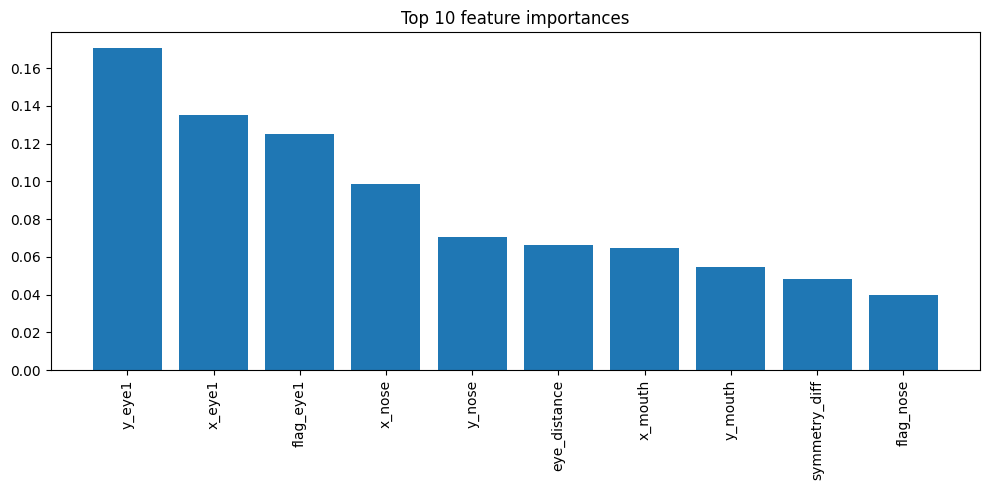

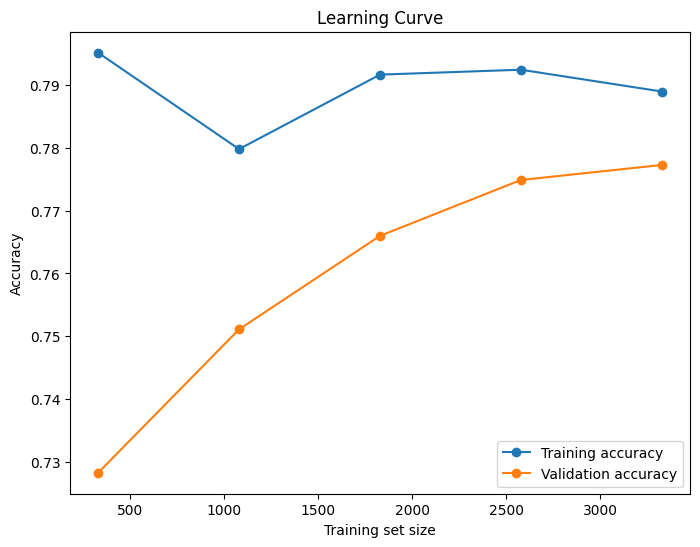


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.85      0.67      0.75       426
 baby_unsafe       0.72      0.87      0.79       406

    accuracy                           0.77       832
   macro avg       0.78      0.77      0.77       832
weighted avg       0.78      0.77      0.77       832

Confusion matrix---------------------------------------


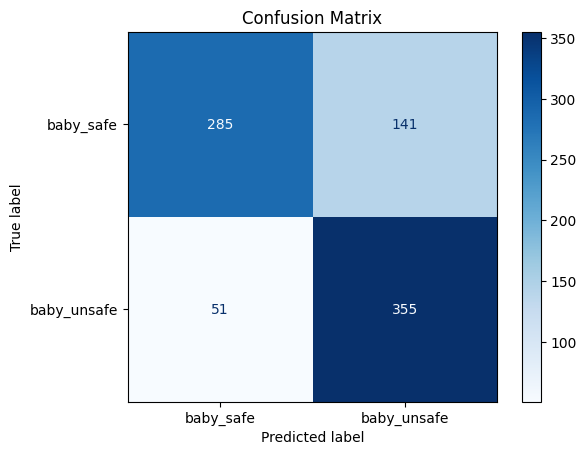

In [10]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDINGS all features normalized

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [11]:
embeddings = emb_builder.embedding_all_features_norm()


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 4158 files processed
2%-->    100 / 4158 files processed
4%-->    200 / 4158 files processed
7%-->    300 / 4158 files processed
9%-->    400 / 4158 files processed
12%-->    500 / 4158 files processed
14%-->    600 / 4158 files processed
16%-->    700 / 4158 files processed
19%-->    800 / 4158 files processed
21%-->    900 / 4158 files processed
24%-->    1000 / 4158 files processed
26%-->    1100 / 4158 files processed
28%-->    1200 / 4158 files processed
31%-->    1300 / 4158 files processed
33%-->    1400 / 4158 files processed
36%-->    1500 / 4158 files processed
38%-->    1600 / 4158 files processed
40%-->    1700 / 4158 files processed
43%-->    1800 / 4158 files processed
45%-->    1900 / 4158 files processed
48%-->    2000 / 4158 files processed
50%-->    2100 / 4158 files processed
52%-->    2200 / 4158 files processed
55%-->    2300 / 4158 files processed
57%-->    240

In [12]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-7.346064,-3.560087,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.519790,-1.998541,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.395011
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,...,-6.005907,-1.195665,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.837183
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.814792,1.258686,0.275490,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.117486,-1.660141,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2.591322
4154,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.402138,-6.815849,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.643094
4155,1,1,1,1,0.597167,0.173149,0.714371,0.172533,0.670616,0.200792,...,1.209954,1.486234,0.117205,0.277495,0.041754,0.179785,83.913839,126.519640,0.051653,0.549858
4156,1,1,1,1,0.443402,0.212502,0.510042,0.202835,0.481855,0.232249,...,1.039154,1.359439,0.067337,0.353005,0.041805,0.172737,120.912051,106.596983,0.007047,1.268730


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


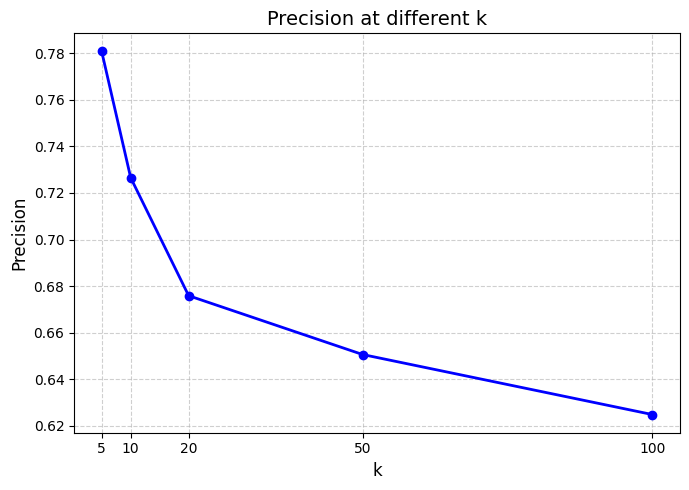


Recall at R-------------------------------------------------------------------------------
0.5498375106937107

Silhouette score--------------------------------------------------------------------------


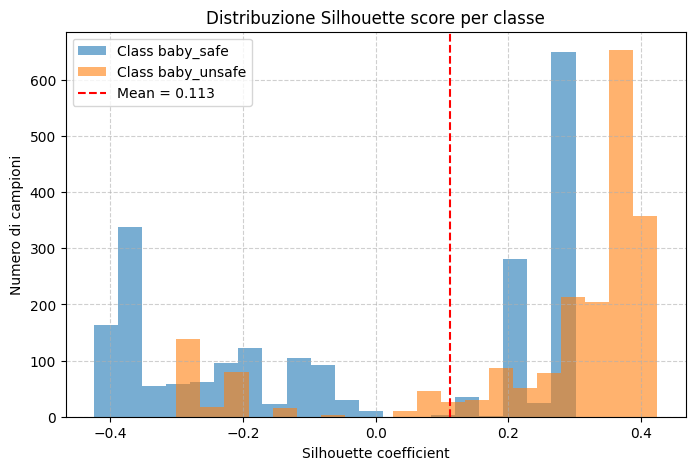


Embeddings distributions------------------------------------------------------------------


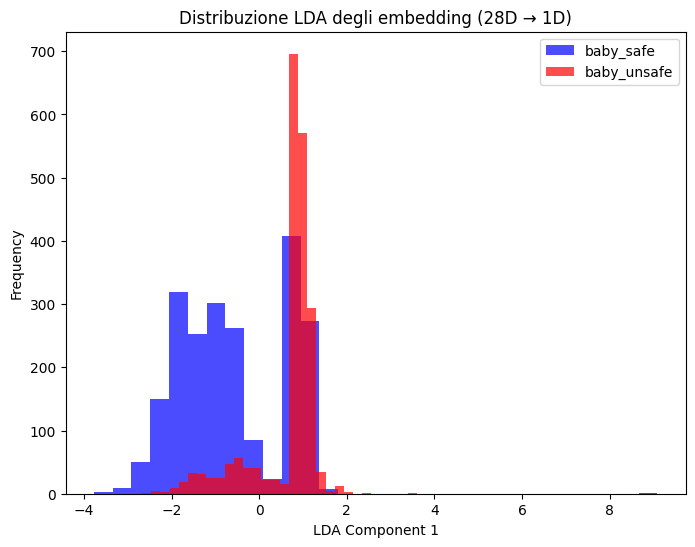

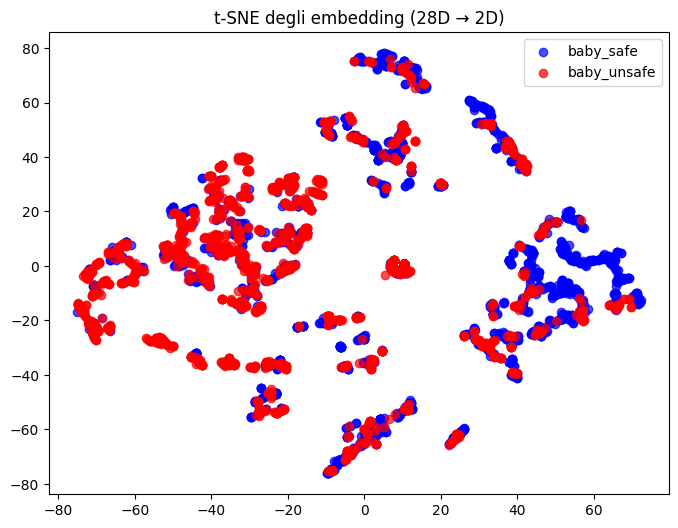

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


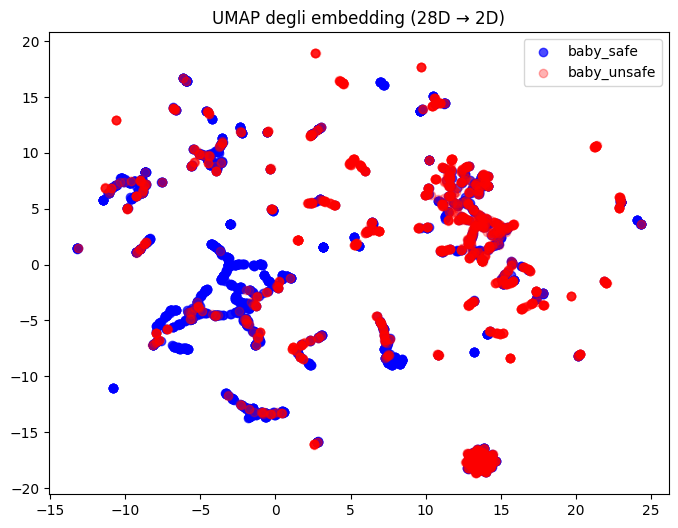

In [13]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


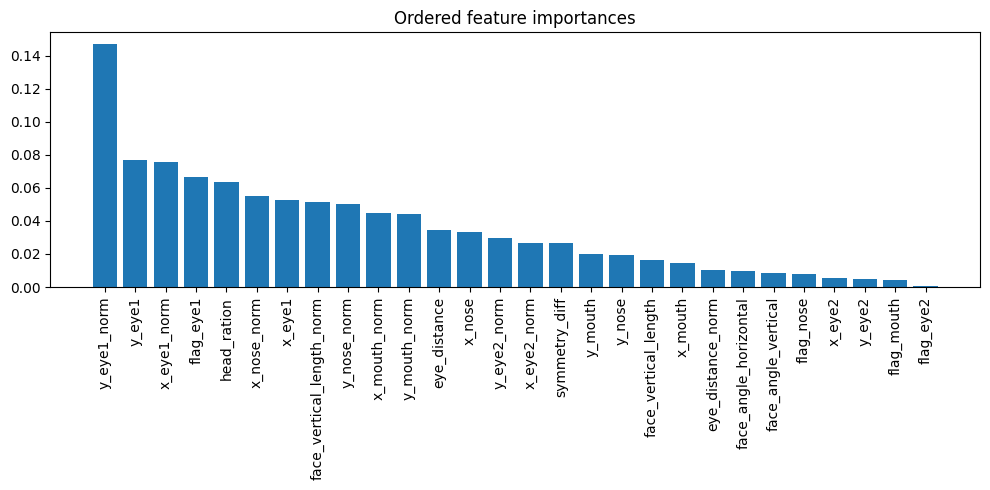

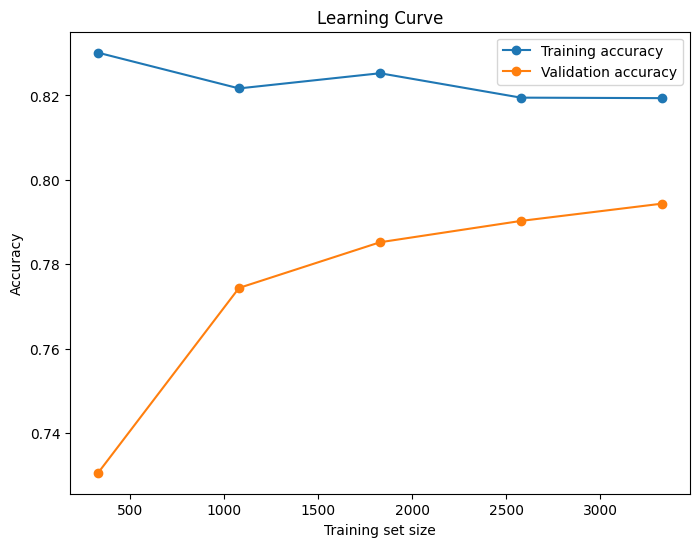


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.68      0.76       426
 baby_unsafe       0.73      0.89      0.80       406

    accuracy                           0.78       832
   macro avg       0.80      0.79      0.78       832
weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


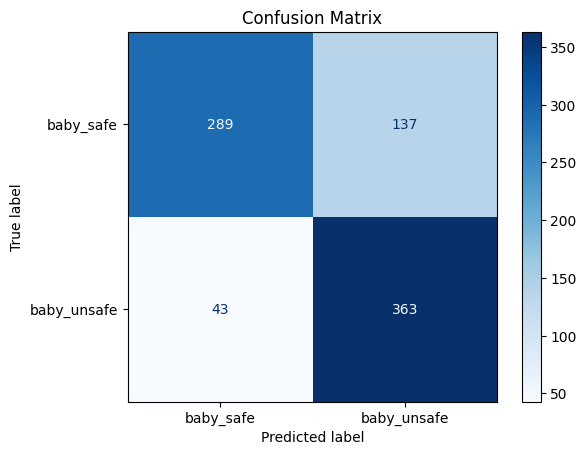

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


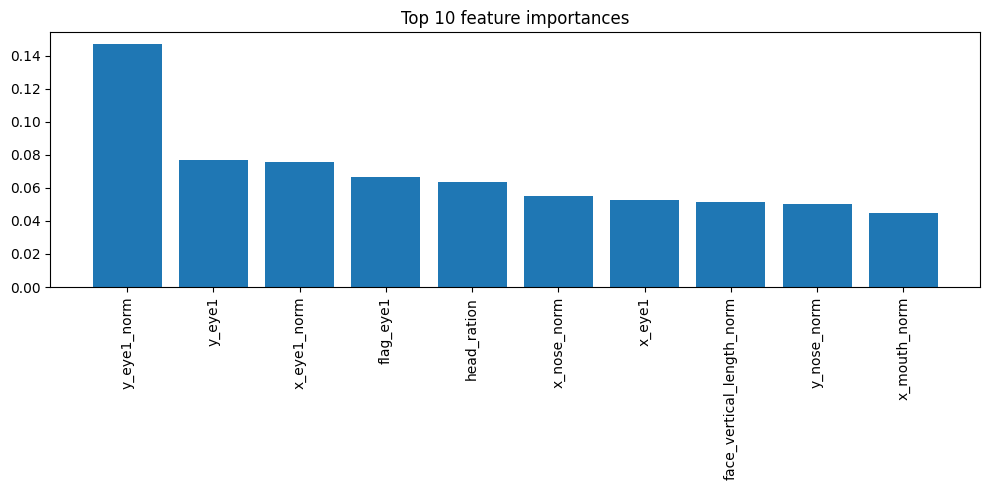

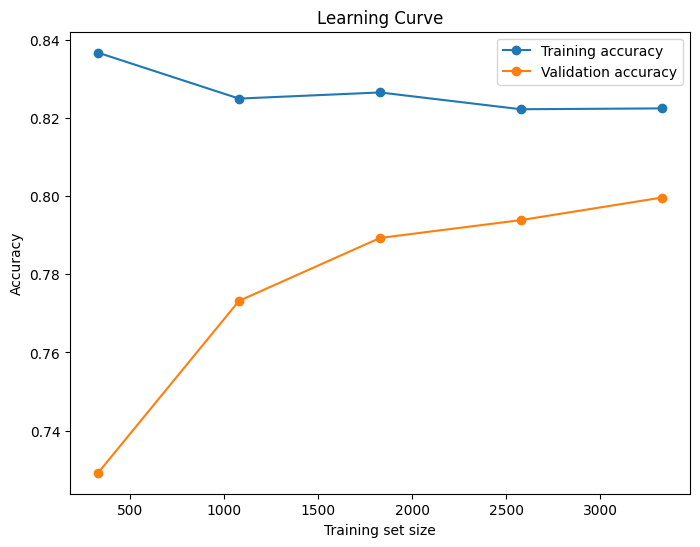


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.67      0.76       426
 baby_unsafe       0.72      0.90      0.80       406

    accuracy                           0.78       832
   macro avg       0.80      0.79      0.78       832
weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


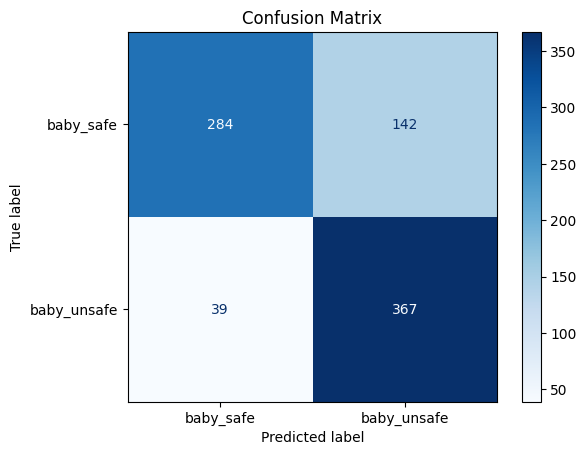

In [14]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


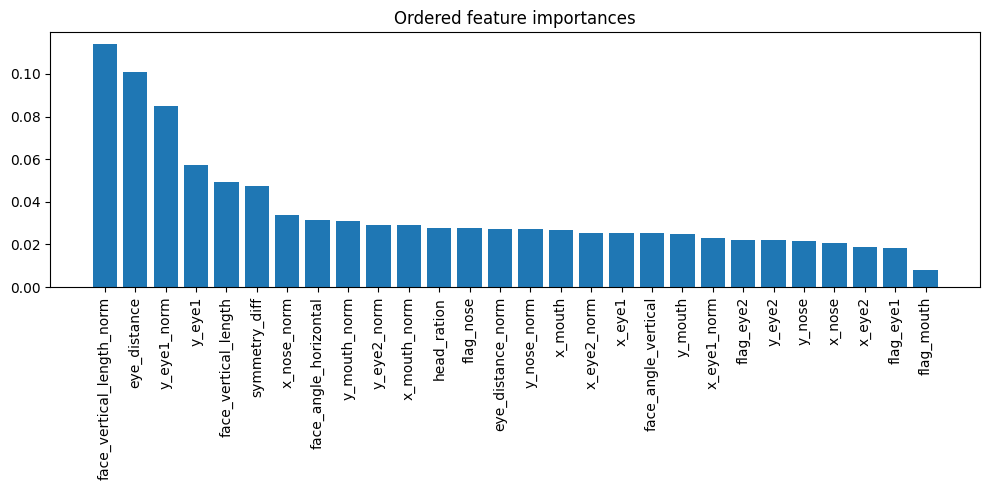

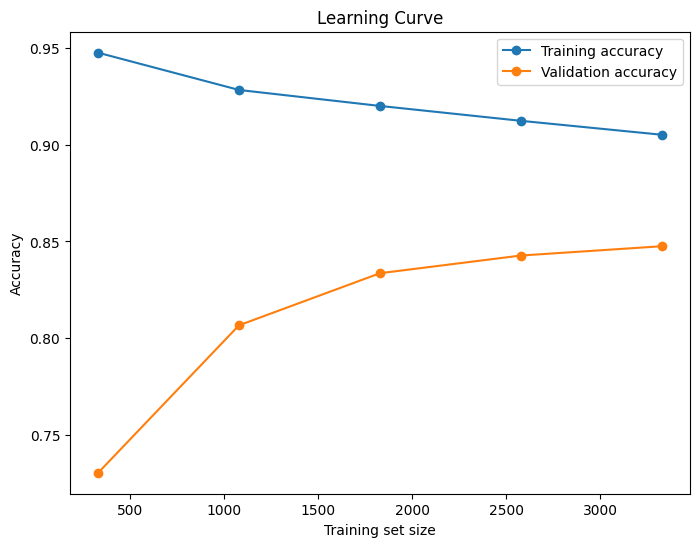


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.78      0.83       426
 baby_unsafe       0.80      0.89      0.84       406

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.84      0.84      0.83       832

Confusion matrix---------------------------------------


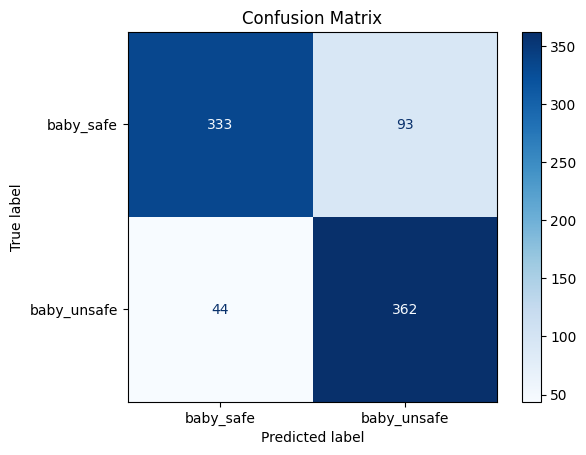

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


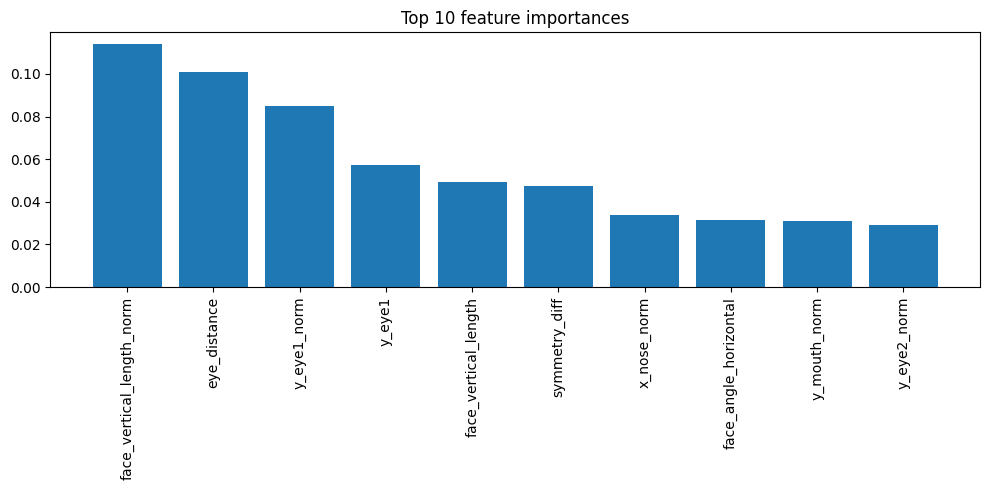

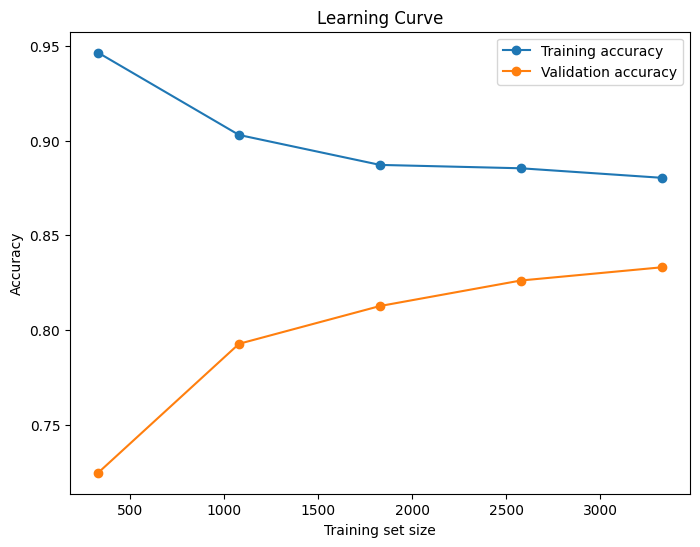


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.76      0.81       426
 baby_unsafe       0.78      0.88      0.83       406

    accuracy                           0.82       832
   macro avg       0.82      0.82      0.82       832
weighted avg       0.82      0.82      0.82       832

Confusion matrix---------------------------------------


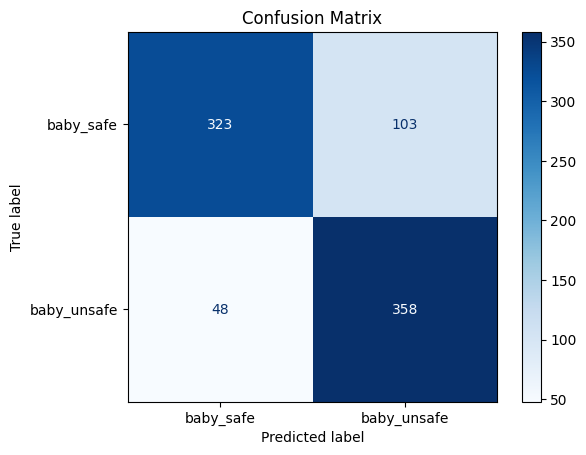

In [15]:
clf.XGBC()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


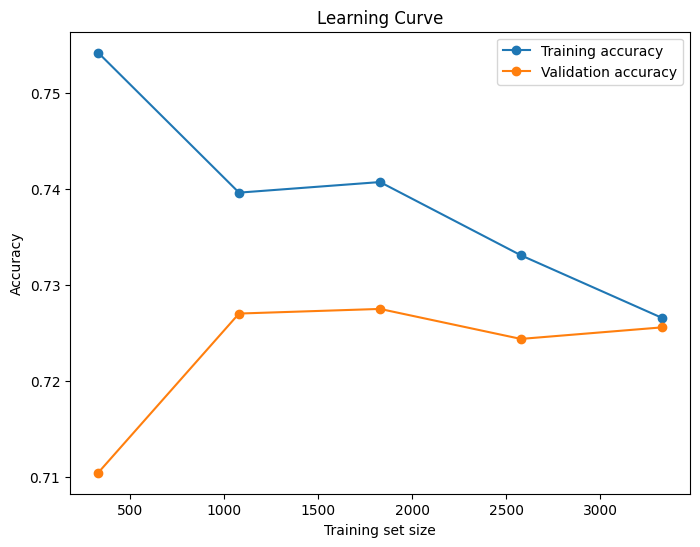


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.76      0.65      0.70       426
 baby_unsafe       0.68      0.79      0.73       406

    accuracy                           0.72       832
   macro avg       0.72      0.72      0.72       832
weighted avg       0.72      0.72      0.72       832

Confusion matrix---------------------------------------


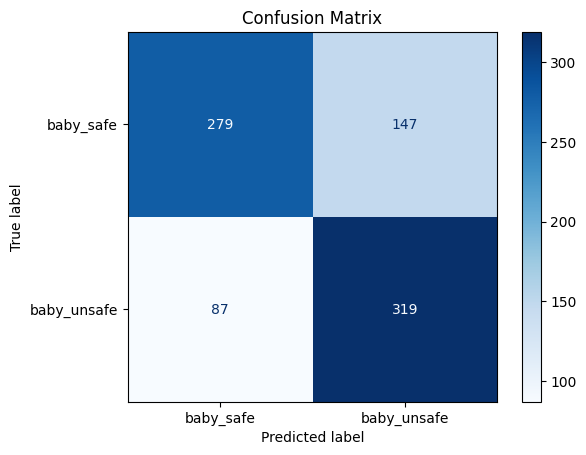

In [16]:
clf.logistic_regression()